#### First Task From Script:

The 4th order Runge-Kutta method is still the best method since it outperforms outher method with lower h. As the h decreases, the Euler method becomes drastically better while the other methods become only a little better. However, the Euler methods seems to be drastically less accurate than the other methods. Furthermore, in the first three graphs, the Euler method is a little (vertically) lower.

Import all neccesary modules needed:

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

Calculate the t-points (code from 3rd code cell in script): 

In [2]:
a = 0.0          # Start of interval
b = 10.0         # end of interval
N = 1000          # number of steps. 1000 gives a nice smooth line
h = (b-a)/N      # size of each step, i.e. delta t
Vout = 0

tpoints = np.arange(a,b,h)

Define the $V_{\rm in}$ function:

$$ V_{\rm in} = \begin{cases} 1 & \text{if } \lfloor 2t \rfloor\  \text{is even}, \\ 
-1  & \text{if } \lfloor 2t \rfloor\  \text{is odd}, \end{cases} 
$$

Define $V_{\rm in}$ as a function of t and use `np.floor()` function to caclculate $2t$ to the nearest lower integer. And use `if` and `else` statements to denote the two possibilities of odd or even.

Use:

$$ \text{for an integer n:}\\
\\
(-1)^n = 1  \ \text{if even}
\\
(-1)^n = -1  \ \text{if odd}
$$


In [3]:
def wave(t):
    two_t = np.floor(2*t) #2t 
    if (-1)**two_t > 0: 
        Vin = 1 
    else:
        Vin = -1
    
    return Vin

We want to make `Vin` a list (corresponding to the array `tpoints`) so that we can plot it as a graph with `tpoints`:

In [4]:
Vin = [] #empty array of Vin 
for i in tpoints:
    Vin.append(wave(i)) #for every point in 'tpoints' (i), Vin is defined as wave(i)
                        #and put into an array

<IPython.core.display.Javascript object>


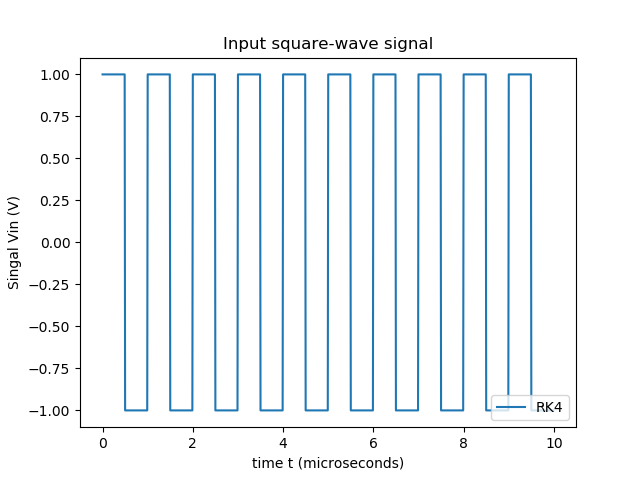

In [5]:
#plot square wave graph of Vin against tpoints:
plt.figure()
plt.plot(tpoints,Vin)
plt.title("Input square-wave signal")
plt.legend(["RK4"],loc="lower right")
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal Vin (V)");
plt.show()

Define the function to repersent the RHS of the differential equation in question:

$$ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}). $$

Define it as a function of $V_{\rm out}$, $t$ and $RC$:


In [6]:
def f(Vout, t, RC):
    ''' Definition of our numerical function
    Inputs:
    Vout: a value or array of Vout values
    t: time at which to evaluate the function
    RC: The resistance and capacitance of the circuit as one variable
    Outputs:
    f(Vout,t, RC): function evaluated for this Vout, t and RC'''
    
    Vin = wave(t) #define Vin as a function of t (because it IS)


    return (1/RC)*(Vin-Vout) #our function

Define the fourth order Runge-Kutta function (code from 8th code cell in the script):

In [7]:
def RungeKutta4(Vout, tpoints, RC):
    '''Fourth-order Runge Kutta. 
    
    Inputs: initial Vout, array of t-values and RC
    Also depends on step h (global variable).
    #Returns: array of propagated Vout_points'''
    
    Vout_points = [] #New empty array of Vout points 
    
    for t in tpoints: 
        Vout_points.append(Vout) 
        k1 = h*f(Vout,t, RC)     
        k2 = h*f(Vout+0.5*k1, t+0.5*h, RC)
        k3 = h*f(Vout+0.5*k2, t+0.5*h, RC)
        k4 = h*f(Vout+k3, t+h, RC)
        Vout = Vout + (k1 + 2*k2 + 2*k3 + k4)/6 #final total Vout as a result of the Taylor expansion
    
    
    return Vout_points


<IPython.core.display.Javascript object>


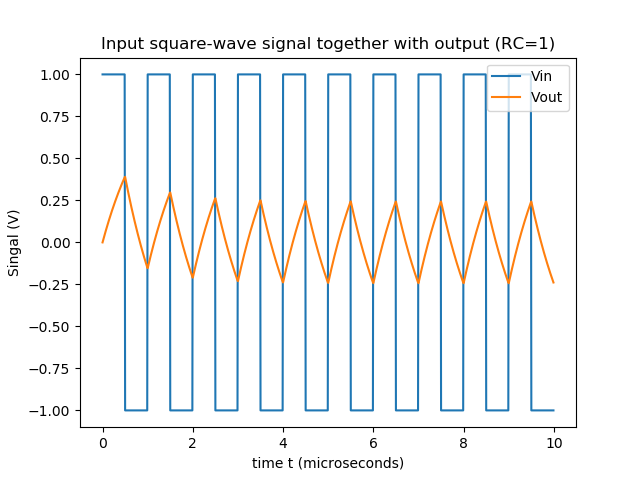

In [8]:
Vout_pointsRK4 = RungeKutta4(Vout, tpoints, 1) #Runge-Kutta function with RC = 1

plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC=1)")
plt.show()

The next two graphs are plots with $RC = 0.1$ and $0.01 \ \mu$s respectivley:

<IPython.core.display.Javascript object>


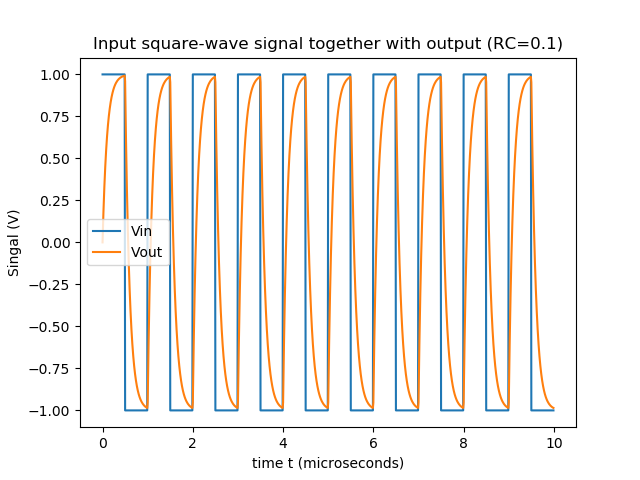

In [9]:
Vout_pointsRK4_2 = RungeKutta4(Vout, tpoints, 0.1)

plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4_2, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC=0.1)")
plt.show()

<IPython.core.display.Javascript object>


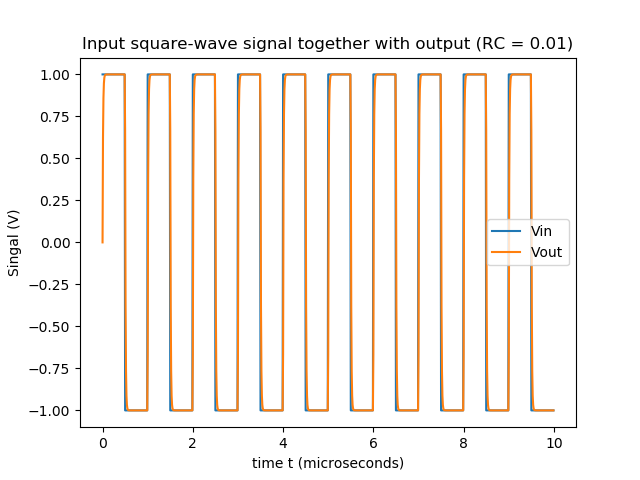

In [138]:
Vout_pointsRK4_3 = RungeKutta4(Vout, tpoints, 0.01)

plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4_3, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC = 0.01)")
plt.show()

#### What I see and what the circuit is doing:

As the time constant (resistance and capacitance) decreases, the max. voltage amplitude (out) increases and becomes more identical to the input voltage signal. This is because there is less load resistance which enables more volts through the volt meter. 

NB: The time constant is:

$$ \tau = RC $$

Looking at the graphs above, we can say that; at lower time-constants, the higher the max. amplitude of the ouput voltatge. i.e  The output signal matches the input signal more and more as the time constant decreases. Therefore, the cirucit is called a "low-pass filter" because it lets through signals with lower time constant. In other words, the lower the time-constant the more the output voltage can "pass" to the voltmeter without loss in voltage. This is because, as the time-constant is lower, the load resistance is lower (as seen in the equation above). 

Change the definition of $V_{in}$ to a sine wave:

In [10]:
def wave(t):
    
    Vin = np.sin(2*t) #new definition of Vin
    
    return Vin

Vin = [] #again, empty Vin array
for i in tpoints:
    Vin.append(wave(i))#for every point in 'tpoints' (i), Vin is defined as wave(i)
                        #and put into an array


<IPython.core.display.Javascript object>


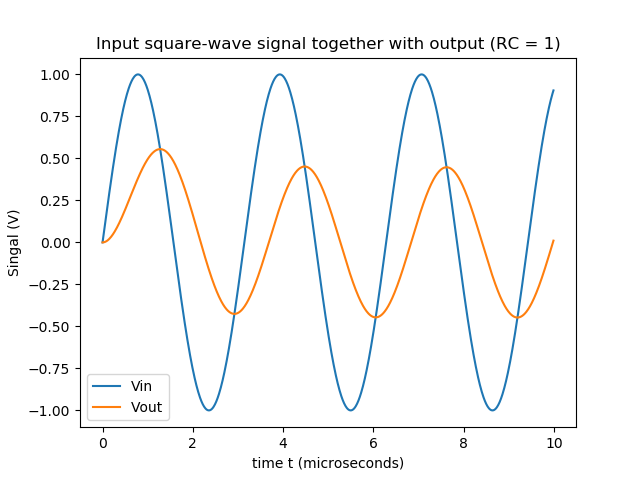

In [11]:
#plot as a sin wave:

Vout_pointsRK4 = RungeKutta4(Vout, tpoints, 1)


plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC = 1)")
plt.show()

The next two graphs are plots with $RC = 0.1$ and $0.01 \ \mu$s respectivley:

<IPython.core.display.Javascript object>


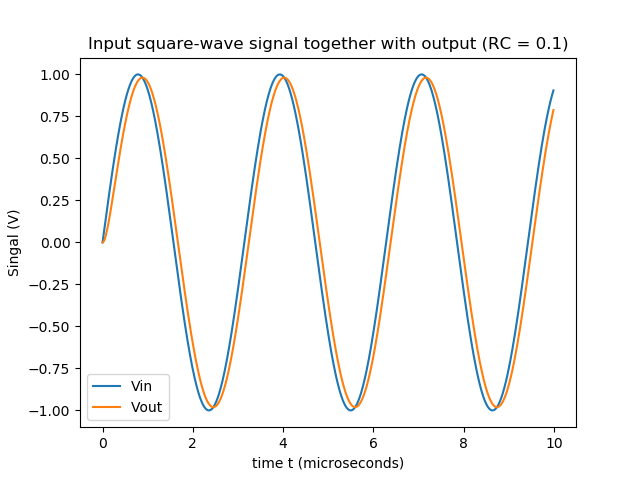

In [12]:
Vout_pointsRK4_2 = RungeKutta4(Vout, tpoints, 0.1)

plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4_2, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC = 0.1)")
plt.show()

<IPython.core.display.Javascript object>


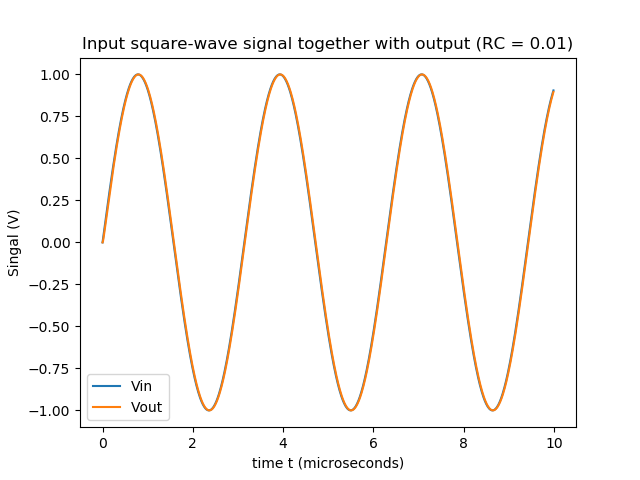

In [117]:
Vout_pointsRK4_3 = RungeKutta4(Vout, tpoints, 0.01)

plt.figure()
plt.plot(tpoints,Vin, label='Vin')
plt.plot(tpoints, Vout_pointsRK4_3, label='Vout')
plt.xlabel("time t (microseconds)")
plt.ylabel("Singal (V)");
plt.legend()
plt.title("Input square-wave signal together with output (RC = 0.01)")
plt.show()

As you can see, the waves are very similar to the square wave. The filter has the same effect. I can't seem to note any meaningful different between the two types of graph.